In [2]:
from sentence_transformers import SentenceTransformer
from wordcloud import WordCloud, STOPWORDS
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast

c:\Users\Gebruiker\anaconda3\envs\thesis1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Read data file and make embed lists

In [3]:
import os

res = pd.DataFrame()

files = os.listdir('data/train')
index = 0
num_of_jsons = 10

# 10 json files atm
for i in range(num_of_jsons):
    filename = files[i]
    print(filename)
    df = pd.read_json(f'data/train/{filename}')
    df = df.drop(['tokens', 'diffbotUri', 'text', 'images'], axis=1)

    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

    df['keys'] = ''
    df['values'] = ''
    df['title embeddings'] = ''

    i = 0
    for row in df['specs']:
        row_keys = list(row.keys())
        row_values = list(row.values())
        df.at[i, 'keys'] = row_keys
        df.at[i, 'values'] = row_values
        i += 1

    a = 0
    for row in df['title']:
        title_embed = model.encode(row)
        df.at[a, 'title embeddings'] = title_embed
        a += 1


    df = df.drop('specs', axis=1)
    res = res.append(df)
    print(f'df shape{i}:{df.shape}')
    print(f'res shape{i}:{res.shape}')
    index += 1

dataset-000.json
df shape2173:(2173, 4)
res shape2173:(2173, 4)
dataset-001.json
df shape2351:(2351, 4)
res shape2351:(4524, 4)
dataset-002.json
df shape2281:(2281, 4)
res shape2281:(6805, 4)
dataset-003.json
df shape2260:(2260, 4)
res shape2260:(9065, 4)
dataset-004.json
df shape2314:(2314, 4)
res shape2314:(11379, 4)
dataset-005.json
df shape2161:(2161, 4)
res shape2161:(13540, 4)
dataset-006.json
df shape2332:(2332, 4)
res shape2332:(15872, 4)
dataset-007.json
df shape2224:(2224, 4)
res shape2224:(18096, 4)
dataset-008.json
df shape2305:(2305, 4)
res shape2305:(20401, 4)
dataset-009.json
df shape2264:(2264, 4)
res shape2264:(22665, 4)


In [4]:
res = res.drop_duplicates(subset='title')
res = res.reset_index()
res.rename(columns = {'index':'Prod_ID'}, inplace = True)
id_list = list(range(1,len(res)+1))
res['Prod_ID'] = id_list
res['Prod_ID'] = 'ID_' + res['Prod_ID'].astype('string')

In [5]:
res

,Prod_ID,title,keys,values,title embeddings
0,ID_1,Offering you a complete choice of products whi...,"[size, color]","[All Sizes, Black]","[-0.052266043, 0.34307656, -0.05728973, -0.145..."
1,ID_2,Acrylic Sheet in Surat,[specifications],[-],"[-0.6556488, 0.460035, -0.0362479, -0.06235854..."
2,ID_3,"Netgear ReadyNAS 312 2-Bay, 2x2TB Desktop Drive","[form_factor, total_number_of_usb_ports, produ...","[Desktop, 3, 300, Dual-core (2 Core), 2, Seria...","[-0.00080985145, 0.44421533, 0.13045506, -0.05..."
3,ID_4,Stochastic Calculus for Finance II,[copyright_holder],[Springer Science+Business Media New York],"[0.04476561, -0.3264529, -0.5369208, -0.123263..."
4,ID_5,VIVOTEK IB8382-ET 5MP Bullet Network Camera,"[chip_inch_size, specialist_type, compression_...","[1/3, Network, H.264, MJPEG, Color / Monochrom...","[-0.13799621, -0.07379925, -0.2992541, 0.01109..."
...,...,...,...,...,...
19205,ID_19206,Leviton 47605-MDU MDU Compact Structured Media...,[color],[White],"[-0.12505426, 0.5645498, -0.04762904, 0.011085..."
19206,ID_19207,Osiris Men’s D3R1 Skate Shoe,"[department, productgroup, binding, producttyp...","[mens, Shoes, Shoes, Shoes]","[-0.591294, -0.29729113, 0.25317273, -0.005742..."
19207,ID_19208,Ace Wood Royal Solid Color Latex Siding & Trim...,"[application_method, waterproof, uv_resistant,...","[Brush, Yes, Yes, Outdoor]","[-0.2405027, 0.9300106, 0.41447017, -0.1310352..."
19208,ID_19209,2-Piece Babysoft Bodysuit Dress & Cardigan Set,"[age_of_oldest_child, number_of_kids, age_of_y...","[5-6, 2, Less Than 6 Months]","[0.37618643, 0.50445473, 0.32708898, 0.6376861..."


In [6]:
all_data = res.drop(columns='title embeddings')
all_data = all_data.explode(['keys', 'values'])
all_data['title'] = all_data['title'].str.replace(r"'", "", regex=True)
all_data.to_csv('all_data.csv')

In [7]:
all_data

,Prod_ID,title,keys,values
0,ID_1,Offering you a complete choice of products whi...,size,All Sizes
0,ID_1,Offering you a complete choice of products whi...,color,Black
1,ID_2,Acrylic Sheet in Surat,specifications,-
2,ID_3,"Netgear ReadyNAS 312 2-Bay, 2x2TB Desktop Drive",form_factor,Desktop
2,ID_3,"Netgear ReadyNAS 312 2-Bay, 2x2TB Desktop Drive",total_number_of_usb_ports,3
...,...,...,...,...
19209,ID_19210,Fossil Womens Watch ME3065,band_length,Women's Standard
19209,ID_19210,Fossil Womens Watch ME3065,warranty_type,Manufacturer
19209,ID_19210,Fossil Womens Watch ME3065,movement,Automatic
19209,ID_19210,Fossil Womens Watch ME3065,band_width,18 millimetres


In [8]:
# Only if needed


# res = pd.read_pickle(r'10jsons.pkl')

In [6]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Make key embed list
all_k = res.explode('keys')
keys = all_k.drop_duplicates(subset='keys')

key_list = keys["keys"].values.tolist()
key_embed_list = model.encode(key_list)

key_embed_f = list(zip(key_list, key_embed_list)) # makes the embeds into a list 
key_embed_f = pd.DataFrame(key_embed_f, columns=['keys', 'key_embeds'])

# Make value embed list
all_v = res.explode('values')
values = all_v.drop_duplicates(subset='values')
value_list = values["values"].values.tolist()
value_embed_list = model.encode(value_list)

value_embed_f = list(zip(value_list, value_embed_list))
value_embed_f = pd.DataFrame(value_embed_f, columns=['values', 'value_embeds'])

# Cluster attributes and values

### Cluster Keys

In [7]:
key_embed_f = pd.read_pickle('key_embeds.pkl')

db = DBSCAN(eps=5.5, min_samples=2).fit(key_embed_list)
keys_labels = db.labels_

keys = key_embed_f['keys']
df_new = list(zip(keys, keys_labels, key_embed_list))
sorted_keys = pd.DataFrame(df_new, columns=['keys', 'cluster_num', 'key_embeds'])
sorted_keys = sorted_keys.sort_values(by=['cluster_num'])
outliers_key = sorted_keys[sorted_keys.cluster_num <= 0]
outliers_key = outliers_key.drop(['cluster_num', 'key_embeds'], axis=1)
#outliers_key['cluster_num'] = 'no_cluster'
print(f'outliers shape: {outliers_key.shape}')
key_clusters_em = sorted_keys[sorted_keys.cluster_num > 0]
print(f'clusters shape: {key_clusters_em.shape}')
key_clusters_em.to_csv(f'key_clusters_em.csv')
key_clusters = key_clusters_em.drop(['key_embeds'], axis=1)
item = key_clusters.iloc[-1:]
item = int(item['cluster_num']) + 1
key_clusters.to_csv('no_norm/phase1/key_clusters.csv')
cluster_numbers1 = list(range(item, len(outliers_key)+item))
outliers_key['cluster_num'] = cluster_numbers1
all_keys = outliers_key.append(key_clusters, ignore_index=True)
all_keys.to_csv('no_norm/phase1/all_keys.csv')

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(keys_labels)) - (1 if -1 in keys_labels else 0)
n_noise_ = list(keys_labels).count(-1)

print("Estimated number of key clusters: %d" % n_clusters_)
print("Estimated number of key noise points: %d" % n_noise_)

outliers shape: (1148, 1)
clusters shape: (965, 3)
Estimated number of key clusters: 292
Estimated number of key noise points: 1146


### Cluster Values

In [8]:
db = DBSCAN(eps=5.5, min_samples=10).fit(value_embed_list)
value_labels = db.labels_

values = value_embed_f['values']
df_new = list(zip(values, value_labels))
sorted_values = pd.DataFrame(df_new, columns=['values', 'cluster_num'])
sorted_values = sorted_values.sort_values(by=['cluster_num'])
outliers_value = sorted_values[sorted_values.cluster_num <= 1]
outliers_value = outliers_value.drop(['cluster_num'], axis=1)
outliers_value['cluster_num'] = 'no_cluster'
print(f'outliers shape: {outliers_value.shape}')
value_clusters = sorted_values[sorted_values.cluster_num > 1]
print(f'clusters shape: {value_clusters.shape}')
item = value_clusters.iloc[-1:]
item = int(item['cluster_num']) + 1
cluster_numbers2 = list(range(item, len(outliers_value)+item))
outliers_value['cluster_num'] = cluster_numbers2
value_clusters.to_csv('no_norm/phase1/value_clusters.csv')
all_values = outliers_value.append(value_clusters, ignore_index=True)
all_values.to_csv('no_norm/phase1/all_values.csv')


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(value_labels)) - (1 if -1 in value_labels else 0)
n_noise_ = list(value_labels).count(-1)

print("Estimated number of title clusters: %d" % n_clusters_)
print("Estimated number of title noise points: %d" % n_noise_)

outliers shape: (9265, 2)
clusters shape: (1435, 2)
Estimated number of title clusters: 65
Estimated number of title noise points: 6412


In [12]:
def get_items_nc_value(value):
    items = all_data.loc[all_data['values'] == value]
    return items
#prod, keys,
def get_items_c_value(value):
    #items = all_data.loc[all_data['values'] == value]
    clus_item = all_values.loc[all_values['values'] == value]
    clus_num_item = int(clus_item['cluster_num'])
    all_value = all_values.loc[all_values['cluster_num'] == clus_num_item]
    all_value = list(all_value['values'])
    items = pd.DataFrame()
    for item in all_value:
        it = all_data.loc[all_data['values'] == item]
        items = items.append(it)

    product_ids = list(items['Prod_ID'])
    all_items = pd.DataFrame()
    for id in product_ids:
        items = res.loc[res['Prod_ID'] == id]
        all_items = all_items.append(items)

    return all_items



In [13]:
def get_items_nc_key(key):
    items = all_data.loc[all_data['keys'] == key]
    return items

#prod, keys,
def get_items_c_key(key):
    #items = all_data.loc[all_data['values'] == value]
    clus_item = all_keys.loc[all_keys['keys'] == key]
    clus_num_item = int(clus_item['cluster_num'])
    all_key = all_keys.loc[all_keys['cluster_num'] == clus_num_item]
    
    all_key = list(all_key['keys'])
    items = pd.DataFrame()
    for item in all_key:
        it = all_data.loc[all_data['keys'] == item]
        items = items.append(it)

    product_ids = list(items['Prod_ID'])
    all_items = pd.DataFrame()
    for id in product_ids:
        items = res.loc[res['Prod_ID'] == id]
        all_items = all_items.append(items)
    all_items = all_items.explode(['keys','values'])
    all_items = all_items.loc[all_items['keys'].isin(all_key)]

    return all_items

## Cluster with DBSCAN

In [9]:
final = pd.DataFrame()
outliers = pd.DataFrame()
epsilon = [3.5, 4, 4.5, 5, 5.5]

# Cluster title embeddings (combined 10 MAE data parts)
num_out = len(res)
i = 0

if i == 0:
    add_on = ['a', 'b', 'c', 'd', 'e']

    print(i, f'epsilon = {epsilon[i]}')
    title_embeds = []

    for row in res['title embeddings']:
        title_embeds.append(row)

    eps = epsilon[0]
    db = DBSCAN(eps=eps, min_samples=10).fit(title_embeds)
    title_labels = db.labels_

    id = res['Prod_ID']
    titles = res['title']
    keys = res['keys']
    values = res['values']
    title_embed = res['title embeddings']
    df_new = list(zip(id, titles, keys, values, title_labels, title_embed))
    sorted_titles = pd.DataFrame(df_new, columns=['Prod_ID', 'titles', 'keys', 'values', 'cluster_num', 'title_embeds'])
    sorted_titles = sorted_titles.sort_values(by=['cluster_num'])
    outliers = sorted_titles[sorted_titles.cluster_num <= 0]
    print(f'outliers shape: {outliers.shape}')
    clusters = sorted_titles[sorted_titles.cluster_num > 0]
    print(f'clusters shape: {clusters.shape}')

    # add str to cluster number to distinguish between other files
    clusters['cluster_num'] = add_on[i] + clusters['cluster_num'].astype('string')

    final = final.append(clusters)
    print(f'final shape: {final.shape}')


    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(title_labels)) - (1 if -1 in title_labels else 0)
    n_noise_ = list(title_labels).count(-1)

    print("Estimated number of title clusters: %d" % n_clusters_)
    print("Estimated number of title noise points: %d" % n_noise_)


    i += 1

if i != 0:
    
    add_on = ['a', 'b', 'c', 'd', 'e']

    while i < len(epsilon):
        print(i, f'epsilon = {epsilon[i]}')
        title_embeds = []

        for row in outliers['title_embeds']:
            title_embeds.append(row)
        
        eps = epsilon[i]
        db = DBSCAN(eps=eps, min_samples=10).fit(title_embeds)
        title_labels = db.labels_

        id = outliers['Prod_ID']
        titles = outliers['titles']
        keys = outliers['keys']
        values = outliers['values']
        title_embed = outliers['title_embeds']
        df_new = list(zip(id, titles, keys, values, title_labels, title_embed))
        sorted_titles = pd.DataFrame(df_new, columns=['Prod_ID', 'titles', 'keys', 'values', 'cluster_num', 'title_embeds'])
        sorted_titles = sorted_titles.sort_values(by=['cluster_num'])
        outliers = sorted_titles[sorted_titles.cluster_num <= 0]
        print(f'outliers shape: {outliers.shape}')
        clusters = sorted_titles[sorted_titles.cluster_num > 0]
        print(f'clusters shape: {clusters.shape}')

        # add str to cluster number to distinguish between other files
        clusters['cluster_num'] = add_on[i] + clusters['cluster_num'].astype('string')

        final = final.append(clusters)
        print(f'final shape: {final.shape}')



        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(title_labels)) - (1 if -1 in title_labels else 0)
        n_noise_ = list(title_labels).count(-1)

        print("Estimated number of title clusters: %d" % n_clusters_)
        print("Estimated number of title noise points: %d" % n_noise_)

        i += 1

0 epsilon = 3.5
outliers shape: (18983, 6)
clusters shape: (227, 6)
final shape: (227, 6)
Estimated number of title clusters: 10
Estimated number of title noise points: 18899
1 epsilon = 4


c:\Users\Gebruiker\anaconda3\envs\thesis1\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


outliers shape: (18372, 6)
clusters shape: (611, 6)
final shape: (838, 6)
Estimated number of title clusters: 26
Estimated number of title noise points: 18326
2 epsilon = 4.5


c:\Users\Gebruiker\anaconda3\envs\thesis1\lib\site-packages\ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


outliers shape: (17551, 6)
clusters shape: (821, 6)
final shape: (1659, 6)
Estimated number of title clusters: 29
Estimated number of title noise points: 16748
3 epsilon = 5


c:\Users\Gebruiker\anaconda3\envs\thesis1\lib\site-packages\ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


outliers shape: (17317, 6)
clusters shape: (234, 6)
final shape: (1893, 6)
Estimated number of title clusters: 19
Estimated number of title noise points: 13599
4 epsilon = 5.5


c:\Users\Gebruiker\anaconda3\envs\thesis1\lib\site-packages\ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


outliers shape: (17279, 6)
clusters shape: (38, 6)
final shape: (1931, 6)
Estimated number of title clusters: 4
Estimated number of title noise points: 8803


c:\Users\Gebruiker\anaconda3\envs\thesis1\lib\site-packages\ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
end_out = outliers.drop(['title_embeds'], axis=1)
end_out.to_csv(f'no_norm/phase1/outliers.csv')

In [11]:
end = final.drop(['title_embeds'], axis=1)
end.to_csv('no_norm/phase1/all_clusters.csv')

## Wordcloud

Replacement Notebook Battery for HP G62-b37SO 10.8 Volt Li-ion Advanced Pro Series Laptop Battery
Replacement Notebook Battery for Sony VAIO VGN-NR410 Series 11.1 Volt Li-ion Advanced Pro Series Laptop Battery
Replacement Notebook Battery for Toshiba Satellite M307 Series 10.8 Volt Li-ion Advanced Pro Series Laptop Battery
Replacement Notebook Battery for Compaq Presario CQ62-206SO 10.8 Volt Li-ion Advanced Pro Series Laptop Battery
Replacement Notebook Battery for Toshiba Satellite L305D-S5893 10.8 Volt Li-ion Advanced Pro Series Laptop Battery
Replacement Notebook Battery for Acer Aspire 5680-6063 11.1 Volt Li-ion Advanced Pro Series Laptop Battery
Replacement for CHICONY Laptop Battery (12 V 48 Wh Black 4000 mAh 6 cell Ni-MH)
Replacement Notebook Battery for Acer Aspire 7730-4931 11.1 Volt Li-ion Advanced Pro Series Laptop Battery
Replacement for LENOVO Laptop Battery (10.8 V 71 Wh Black 6600 mAh 9 cell Li-ion)
Replacement Notebook Battery for HP Pavilion g6-1035tx 10.8 Volt Li-ion 

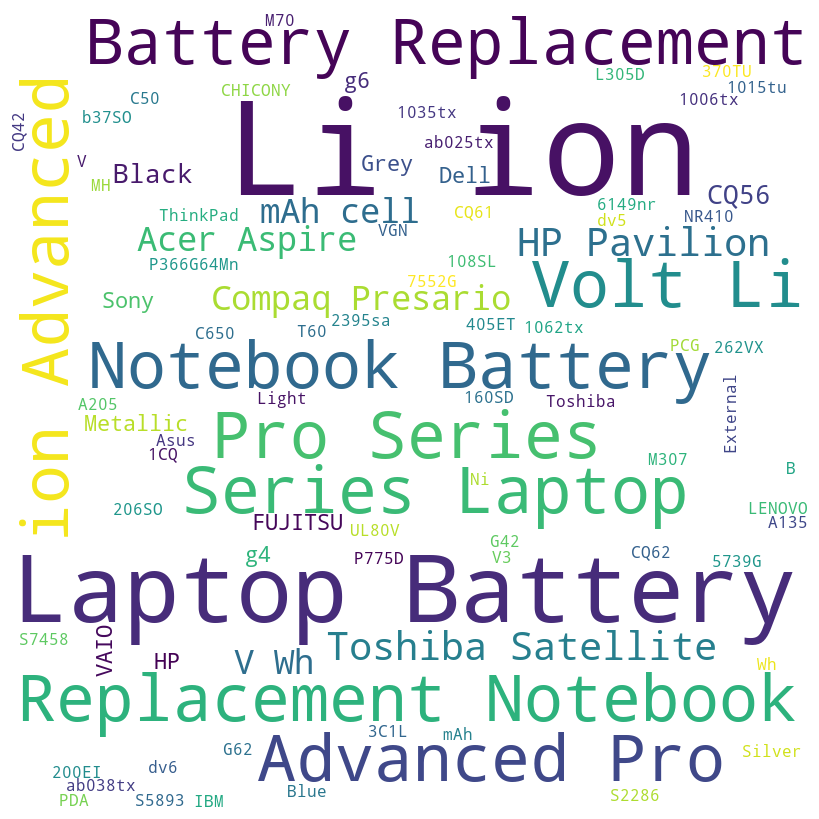

In [12]:
p1 = pd.read_csv('norm/phase1/all_clusters.csv')
#p1 = pd.read_csv('key_clusters.csv')
 
comment_words = ''
stopwords = set(STOPWORDS)


i = 0

for index, row in p1.iterrows():
    clus_num = row['cluster_num']
    if clus_num == 'a1':
        title = row['titles']
        tokens = title.split(',')
        print(title)
        comment_words += " ".join(tokens)+" "
        i += 1

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


print(f'Amount of items in cluster: {i}')
print(f'Amount of words in total: {len(comment_words)}')
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Plotting in matplotlib

Estimated number of clusters: 9
Estimated number of noise points: 0


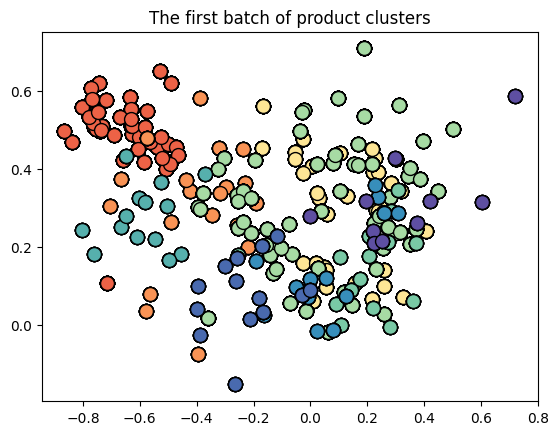

In [69]:
cluster_list = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9']
title_list = []
for index, row in p1.iterrows():
    clus_num = row['cluster_num']
    title = row['titles']
    if clus_num in cluster_list:
        title_list.append(title)

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embed = []
for title in title_list:
    title_embed = model.encode(title)
    embed.append(title_embed)
embed = np.array(embed)


db = DBSCAN(eps=3.5, min_samples=10).fit(embed)
db_labels = db.labels_

list_of_tuples = list(zip(title_list, embed, db_labels))
new_df = pd.DataFrame(list_of_tuples, columns = ['title', 'embed', 'num'])
new_df = new_df.sort_values('num')
new_df.to_csv('plot_paper.csv')

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise_ = list(db_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


unique_labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = unique_labels == k
    xy = embed[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = embed[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )


plt.title(f"The first batch of product clusters")
plt.show()

## Attribute sets
Find clusters of attribute groups

If items have the same attribute group this is a new cluster

In [ ]:
groups = end_out.sort_values(by=['keys'])
groups = groups.reset_index()
groups = groups.drop(columns=['index'])
groups.shape


In [ ]:
# get all key groups that belong to at least 10 items

min_items = 10

df = groups.astype(str)
df_out = df.groupby(['keys']).size().reset_index(name='counter')

cluster_key_list = []

for index_g, row_g in df_out.iterrows():
    count = row_g['counter']
    keys_group = row_g['keys']
    if count >= min_items:
        cluster_key_list.append(keys_group)

print(len(cluster_key_list))

In [ ]:
att_sets = pd.DataFrame()

clus_number = 1

for item in cluster_key_list:
    item = ast.literal_eval(item)
    item = [i.strip() for i in item]
    #print(item)
    for index_g, row_g in groups.iterrows():
        key_group = row_g['keys']
        if item == key_group:
            #print(item)
            # change to matching custer number
            groups.at[index_g, 'cluster_num'] = clus_number
            # add item to cluster
            att_sets = att_sets.append(row_g)
            # remove row from outliers (not on first time running this cell)
            groups = groups.drop(index_g, axis=0)

    clus_number += 1

#att_sets = att_sets.reset_index(inplace=True)
att_sets.to_csv('norm/phase2/att_sets.csv')         
att_sets


In [ ]:
groups

In [ ]:
# add str to cluster number to distinguish between other files
att_sets['cluster_num'] = 'f' + att_sets['cluster_num'].astype('string')
att_sets.to_csv('no_norm/phase2/att_sets.csv')  

In [ ]:
# Add attribute sets to end clusters file
end = end.append(att_sets, ignore_index=True) 
end.to_csv('no_norm/phase2/new_all_clusters.csv') 


In [ ]:
end

## Attribute Domain

Find unique attributes and loop through items

If item has the unique attribute add this item to the cluster

In [ ]:
new_clusters = end.copy()
new_clusters.shape

#should be end_out minus the new clusters from att sets
#but this is also nice to see the difference

new_outliers = groups
new_outliers['cluster_num'] = new_outliers['cluster_num'].astype('string')
new_outliers.shape

In [ ]:
# loop through clusters and add all of the attributes in to the list 
# If the attribute is already in the list --> remove the attribute from the list as it is not unique

# Only do this once
grouped = new_clusters.groupby('cluster_num')

unique_keys = []
duplicates = []

# iterate over each group
for group_name, df_group in grouped:
    print('\nCREATE TABLE {}('.format(group_name))
    df_group = df_group.explode(column='keys')
    df_group = df_group.drop_duplicates('keys')
    keys = list(df_group['keys'])
    for key in keys:
        if key in unique_keys:
            unique_keys.remove(key)
            duplicates.append(key)
        elif key in duplicates:
            None
        else:
            unique_keys.append(key)
    print(");")


In [ ]:
unique_keys_df = pd.DataFrame(columns=['unique_key', 'clus_num'])

for key in unique_keys:
    for index, row in new_clusters.iterrows():
        keys = row['keys']
        clus_num = row['cluster_num']
        if key in keys:
            new_row = [key, clus_num]
            unique_keys_df.loc[len(unique_keys_df)] = new_row

In [ ]:
unique_keys_df = unique_keys_df.drop_duplicates('unique_key')
unique_keys_df.to_csv('no_norm/phase3/unique_keys.csv')

In [ ]:
att_dom = pd.DataFrame()

for index, row in unique_keys_df.iterrows():
    un_key = row['unique_key']
    cluster_num = row['clus_num']
    for index_out, row_out in new_outliers.iterrows():
            keys = row_out['keys']
            if un_key in keys:
                # change to matching cluster number
                new_outliers.at[index_out, 'cluster_num'] = cluster_num
                # add item to cluster
                att_dom = att_dom.append(row_out)
                # remove row from outliers
                new_outliers = new_outliers.drop(index_out, axis=0)

In [ ]:
for index, row in unique_keys_df.iterrows():
    un_key = row['unique_key']
    cluster_num = row['clus_num']
    for index_out, row_out in att_dom.iterrows():
            keys = row_out['keys']
            if un_key in keys:
                # change to matching cluster number
                att_dom.at[index_out, 'cluster_num'] = cluster_num

In [ ]:
att_dom = att_dom.sort_values(by=['cluster_num'])
att_dom.to_csv('no_norm/phase3/att_dom.csv')

In [ ]:
print(f'new outliers shape: {new_outliers.shape}')
print(f'new clusters shape: {att_dom.shape}')

In [ ]:
final_end = att_dom.append(end, ignore_index=True)
final_end = final_end.sort_values(by=['cluster_num'])
final_end.to_csv('no_norm/phase3/final_clusters.csv')